In [34]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import ternary
import warnings
import random

%matplotlib inline
warnings.filterwarnings('ignore')

# Fung et al., 2011 parameter ranges

**Coral Growth:** $r =  0.04–0.2 yr^{-1}$  *(Fung et al., 2011)*

**Coral Background Mortality:**  $mu =  0.02–0.1 yr^{-1}$  *(Fung et al., 2011)*

**Algal Growth Rate:** $gamma = 0.05–0.4 yr^{-1}$ *(Fung et al., 2011)*

**Growth Rate of Turf onto Free Space** $beta = 2–20 yr^{-1}$ *(Fung et al., 2011)*

**Growth rate of corals onto turf relative to the rate onto free space:** $alpha1 = 0.0-1.0$ *(Fung et al., 2011)*

**Growth rate of macroalgae onto turf relative to the rate onto free space** $alpha2 = 0–0.9$ *(Fung et al., 2011)* 

**Rate of macroalgae overgrowth onto coral relative to the rate onto free space** $alpha3 = 0–0.9$ *(Fung et al., 2011)*

# Model without p1, p2,  mu, nor fish

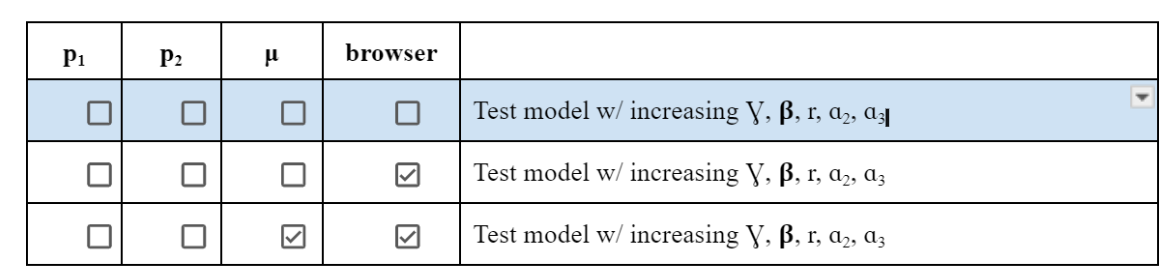

In [168]:
def dNdt(t, N, r, mu, gamma, beta, alpha1, alpha2, alpha3):
    
    C,M,T = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M)*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M)*dt

    return dC, dM, dT

In [169]:
dt = 1
NUMSTEPS = 1000
NUMYEARS = int(NUMSTEPS/dt)
time_points = np.linspace(0, NUMYEARS, NUMSTEPS+1)

r = (0.04 + 0.2)/2 #coral growth
gamma = (0.05 + 0.4)/2 #macro algae growth rate over free space
beta = (2 + 20)/2 #turf growth rate onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space

C0 = 0.99
M0 = 0.005
T0 = 0.005

### Time series (to make sure 1,000 years is enough to reach equilibrium)

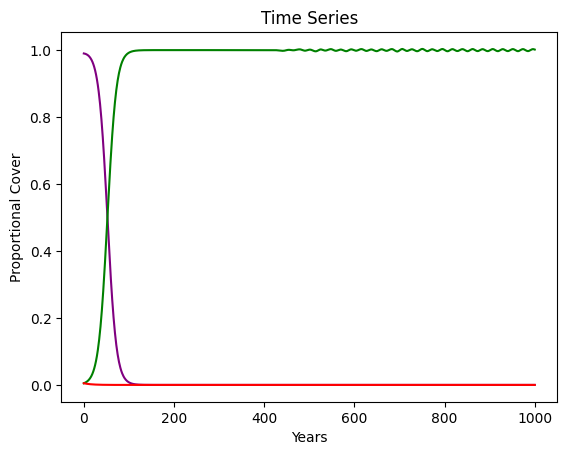

In [129]:
sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
N = sol.sol(time_points)

coral = N[0,:]
macroalgae = N[1,:]
turf = N[2,:]

plt.plot(time_points, coral, color = 'purple', label = 'coral')
plt.plot(time_points, macroalgae, color = "green", label = 'macroalgae')
plt.plot(time_points, turf, color = "red", label = 'turf')

plt.title("Time Series", fontsize = 12)
plt.xlabel("Years")
plt.ylabel("Proportional Cover");

#### Exploring ecosystem outcomes across:
1. Increasing r (coral growth over free space)
2. Increasing gamma (macroalgae growth over free space)
3. Increasing beta (turf algae growth over free space)
4. Alpha1 (growth rate of coral onto turf, relative to free space)
5. Alpha2 (growth rate of macroalgae onto turf, relative to free space)
6. Alpha3 (growth rate of macroalgae onto coral, relative to free space)

In [130]:
#---------r-------------
r_outputs = []
r_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 50)
r_value = np.round(r_value,2)

for r in r_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        r_outputs.append((C_array, M_array, T_array))
        r_outputs_prime.append((r, C_array[-1], M_array[-1], T_array[-1]))
        
#---------GAMMA-------------
gamma_outputs = []
gamma_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 50)
gamma_value = np.round(gamma_value,2)

for gamma in gamma_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        gamma_outputs.append((C_array, M_array, T_array))
        gamma_outputs_prime.append((gamma, C_array[-1], M_array[-1], T_array[-1]))
        
#----------BETA------------
beta_outputs = []
beta_outputs_prime = []

beta_value = np.linspace(2, 20, 50)
beta_value = np.round(beta_value,2)

for beta in beta_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        beta_outputs.append((C_array, M_array, T_array))
        beta_outputs_prime.append((beta, C_array[-1], M_array[-1], T_array[-1]))
        
#---------ALPHA1-------------
alpha1_outputs = []
alpha1_outputs_prime = []

alpha1_value = np.linspace(0, 1.0, 50)
alpha1_value = np.round(alpha1_value,2)
   

for alpha1 in alpha1_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        alpha1_outputs.append((C_array, M_array, T_array))
        alpha1_outputs_prime.append((alpha1, C_array[-1], M_array[-1], T_array[-1]))
        
#---------ALPHA2-------------
alpha2_outputs = []
alpha2_outputs_prime = []

alpha2_value = np.linspace(0, 0.9, 50)
alpha2_value = np.round(alpha2_value,2)
   

for alpha2 in alpha2_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        alpha2_outputs.append((C_array, M_array, T_array))
        alpha2_outputs_prime.append((alpha2, C_array[-1], M_array[-1], T_array[-1]))

#---------ALPHA3-------------
alpha3_outputs = []
alpha3_outputs_prime = []

alpha3_value = np.linspace(0, 0.9, 50)
alpha3_value = np.round(alpha3_value,2)

for alpha3 in alpha3_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        alpha3_outputs.append((C_array, M_array, T_array))
        alpha3_outputs_prime.append((alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [131]:
df_r = pd.DataFrame(r_outputs_prime, columns=['r','C_prime','M_prime','T_prime'])
df_gamma = pd.DataFrame(gamma_outputs_prime, columns=['gamma','C_prime','M_prime','T_prime'])
df_beta = pd.DataFrame(beta_outputs_prime, columns=['beta','C_prime','M_prime','T_prime'])
df_alpha1 = pd.DataFrame(alpha1_outputs_prime, columns=['alpha1','C_prime','M_prime','T_prime'])
df_alpha2 = pd.DataFrame(alpha2_outputs_prime, columns=['alpha2','C_prime','M_prime','T_prime'])
df_alpha3 = pd.DataFrame(alpha3_outputs_prime, columns=['alpha3','C_prime','M_prime','T_prime'])

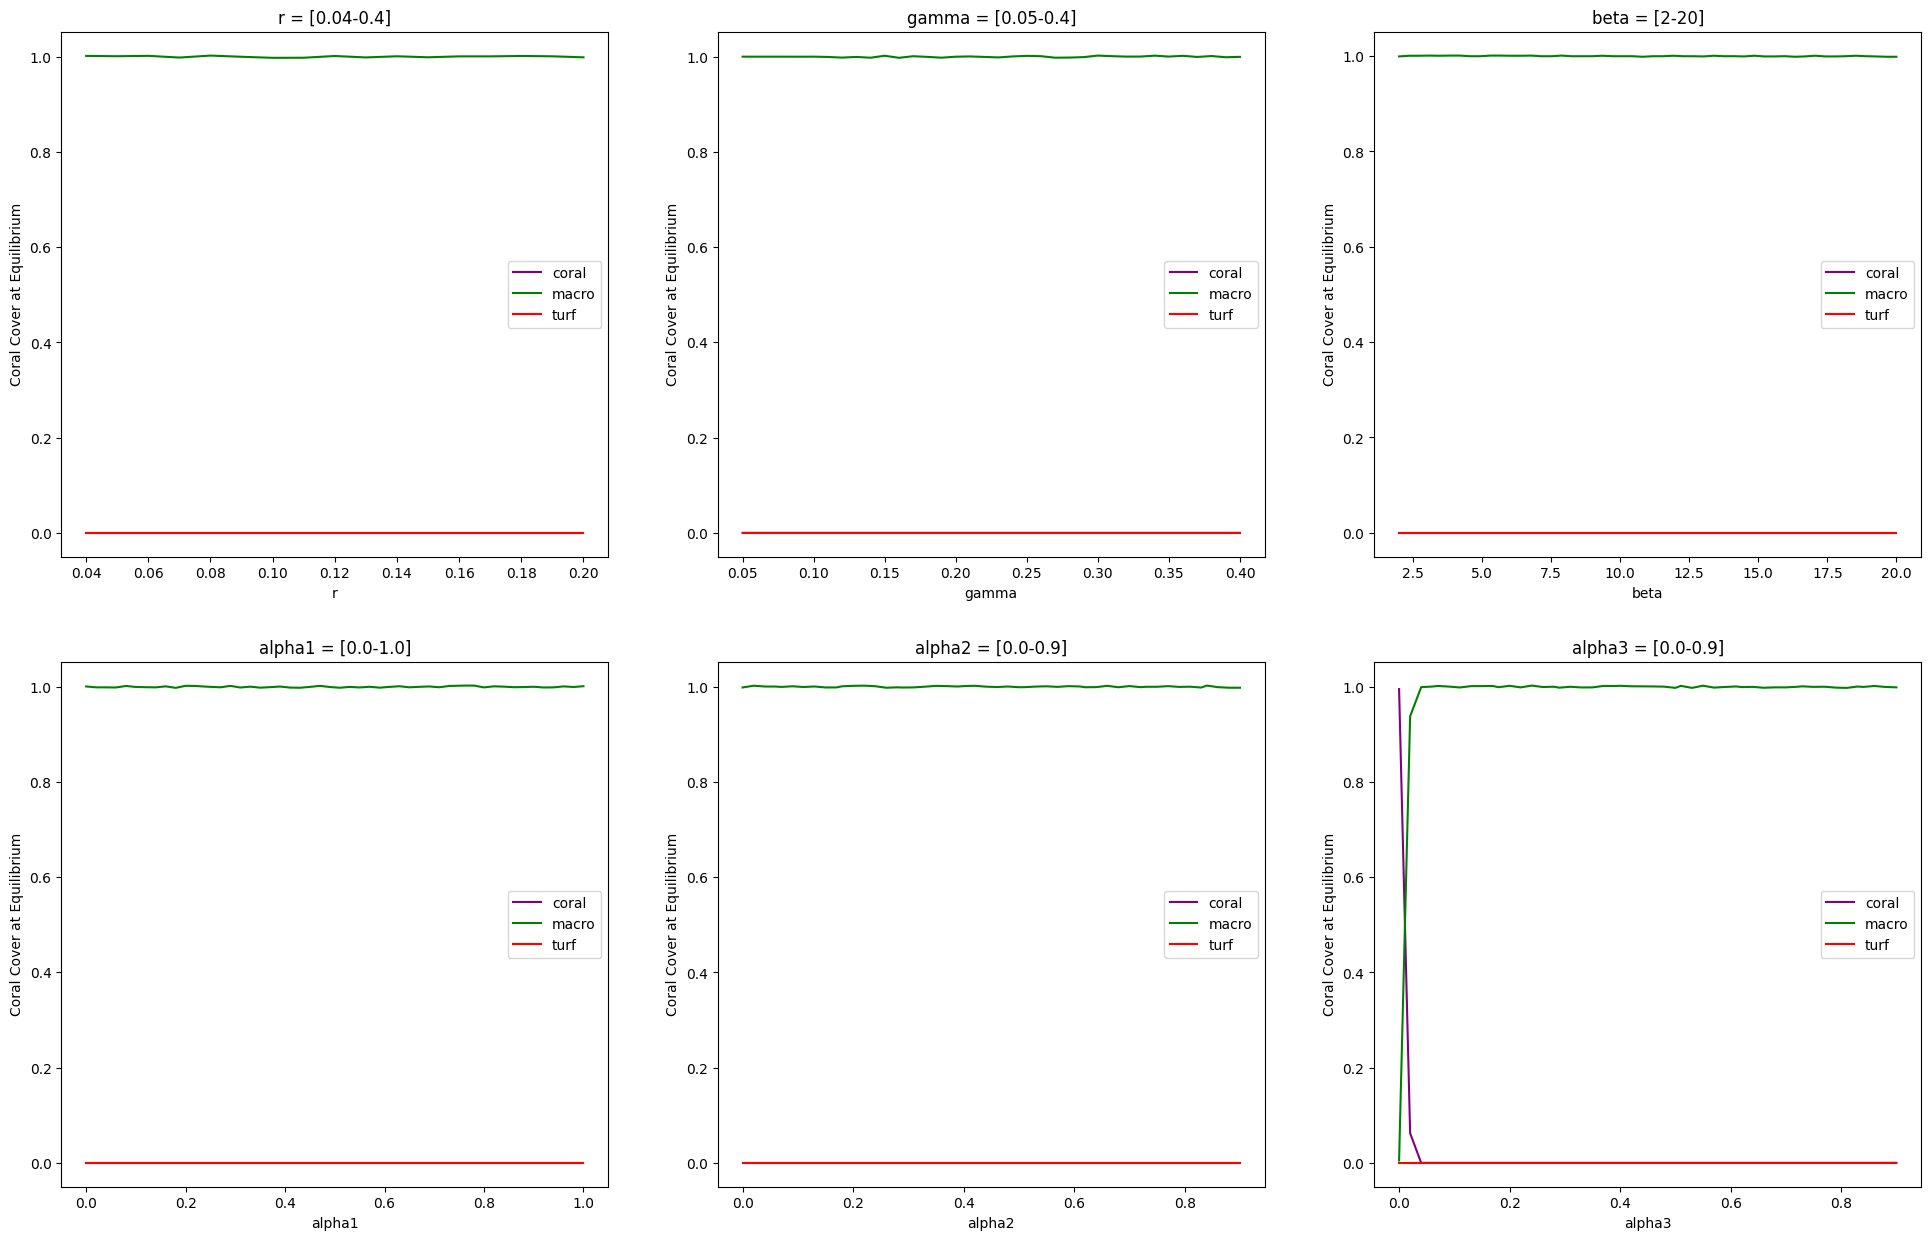

In [132]:
figure, axis = plt.subplots(2, 3, figsize=(24, 15))

#---------r-------------  
axis[0, 0].plot(df_r['r'], df_r['C_prime'], label = 'coral', c = 'purple')
axis[0, 0].plot(df_r['r'], df_r['M_prime'], label = 'macro', c = 'green')
axis[0, 0].plot(df_r['r'], df_r['T_prime'], label = 'turf', c = 'red')

axis[0, 0].set_title("r = [0.04-0.4]", fontsize = 12)
axis[0, 0].set_xlabel("r")
axis[0, 0].set_ylabel("Coral Cover at Equilibrium")
axis[0, 0].legend(); 

#---------GAMMA-------------  
axis[0, 1].plot(df_gamma['gamma'], df_gamma['C_prime'], label = 'coral', c = 'purple')
axis[0, 1].plot(df_gamma['gamma'], df_gamma['M_prime'], label = 'macro', c = 'green')
axis[0, 1].plot(df_gamma['gamma'], df_gamma['T_prime'], label = 'turf', c = 'red')

axis[0, 1].set_title("gamma = [0.05-0.4]", fontsize = 12)
axis[0, 1].set_xlabel("gamma")
axis[0, 1].set_ylabel("Coral Cover at Equilibrium")
axis[0, 1].legend(); 

#----------BETA------------
axis[0, 2].plot(df_beta['beta'], df_beta['C_prime'], label = 'coral', c = 'purple')
axis[0, 2].plot(df_beta['beta'], df_beta['M_prime'], label = 'macro', c = 'green')
axis[0, 2].plot(df_beta['beta'], df_beta['T_prime'], label = 'turf', c = 'red')

axis[0, 2].set_title("beta = [2-20]", fontsize = 12)
axis[0, 2].set_xlabel("beta")
axis[0, 2].set_ylabel("Coral Cover at Equilibrium")
axis[0, 2].legend(); 

#---------ALPHA1-------------
axis[1, 0].plot(df_alpha1['alpha1'], df_alpha1['C_prime'], label = 'coral', c = 'purple')
axis[1, 0].plot(df_alpha1['alpha1'], df_alpha1['M_prime'], label = 'macro', c = 'green')
axis[1, 0].plot(df_alpha1['alpha1'], df_alpha1['T_prime'], label = 'turf', c = 'red')
    
axis[1, 0].set_title("alpha1 = [0.0-1.0]", fontsize = 12)
axis[1, 0].set_xlabel("alpha1")
axis[1, 0].set_ylabel("Coral Cover at Equilibrium")
axis[1, 0].legend();

#---------ALPHA2-------------
axis[1, 1].plot(df_alpha2['alpha2'], df_alpha2['C_prime'], label = 'coral', c = 'purple')
axis[1, 1].plot(df_alpha2['alpha2'], df_alpha2['M_prime'], label = 'macro', c = 'green')
axis[1, 1].plot(df_alpha2['alpha2'], df_alpha2['T_prime'], label = 'turf', c = 'red')
    
axis[1, 1].set_title("alpha2 = [0.0-0.9]", fontsize = 12)
axis[1, 1].set_xlabel("alpha2")
axis[1, 1].set_ylabel("Coral Cover at Equilibrium")
axis[1, 1].legend();

#---------ALPHA3-------------
axis[1, 2].plot(df_alpha3['alpha3'], df_alpha3['C_prime'], label = 'coral', c = 'purple')
axis[1, 2].plot(df_alpha3['alpha3'], df_alpha3['M_prime'], label = 'macro', c = 'green')
axis[1, 2].plot(df_alpha3['alpha3'], df_alpha3['T_prime'], label = 'turf', c = 'red')

axis[1, 2].set_title("alpha3 = [0.0-0.9]", fontsize = 12)
axis[1, 2].set_xlabel("alpha3")
axis[1, 2].set_ylabel("Coral Cover at Equilibrium")
axis[1, 2].legend();

plt.show();

 R x all other parameters

In [136]:
#---------r x gamma-------------
r_gamma_outputs = []
r_gamma_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

for r in r_value:
    
    for gamma in gamma_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_gamma_outputs.append((C_array, M_array, T_array))
            r_gamma_outputs_prime.append((r, gamma, C_array[-1], M_array[-1], T_array[-1]))
            
#---------r x beta-------------
r_beta_outputs = []
r_beta_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

for r in r_value:
    
    for beta in beta_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_beta_outputs.append((C_array, M_array, T_array))
            r_beta_outputs_prime.append((r, beta, C_array[-1], M_array[-1], T_array[-1]))

#---------r x alpha1-------------
r_alpha1_outputs = []
r_alpha1_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

for r in r_value:
    
    for alpha1 in alpha1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_alpha1_outputs.append((C_array, M_array, T_array))
            r_alpha1_outputs_prime.append((r, alpha1, C_array[-1], M_array[-1], T_array[-1]))

#---------r x alpha2-------------
r_alpha2_outputs = []
r_alpha2_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for r in r_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_alpha2_outputs.append((C_array, M_array, T_array))
            r_alpha2_outputs_prime.append((r, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------r x alpha3-------------
r_alpha3_outputs = []
r_alpha3_outputs_prime = []

r_value = np.linspace(0.04, 0.2, 15)
r_value = np.round(r_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for r in r_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            r_alpha3_outputs.append((C_array, M_array, T_array))
            r_alpha3_outputs_prime.append((r, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [137]:
df_r_gamma = pd.DataFrame(r_gamma_outputs_prime, columns=['r','gamma','C_prime','M_prime','T_prime'])
df_r_beta = pd.DataFrame(r_beta_outputs_prime, columns=['r','beta','C_prime','M_prime','T_prime'])
df_r_alpha1 = pd.DataFrame(r_alpha1_outputs_prime, columns=['r','alpha1','C_prime','M_prime','T_prime'])
df_r_alpha2 = pd.DataFrame(r_alpha2_outputs_prime, columns=['r','alpha2','C_prime','M_prime','T_prime'])
df_r_alpha3 = pd.DataFrame(r_alpha3_outputs_prime, columns=['r','alpha3','C_prime','M_prime','T_prime'])

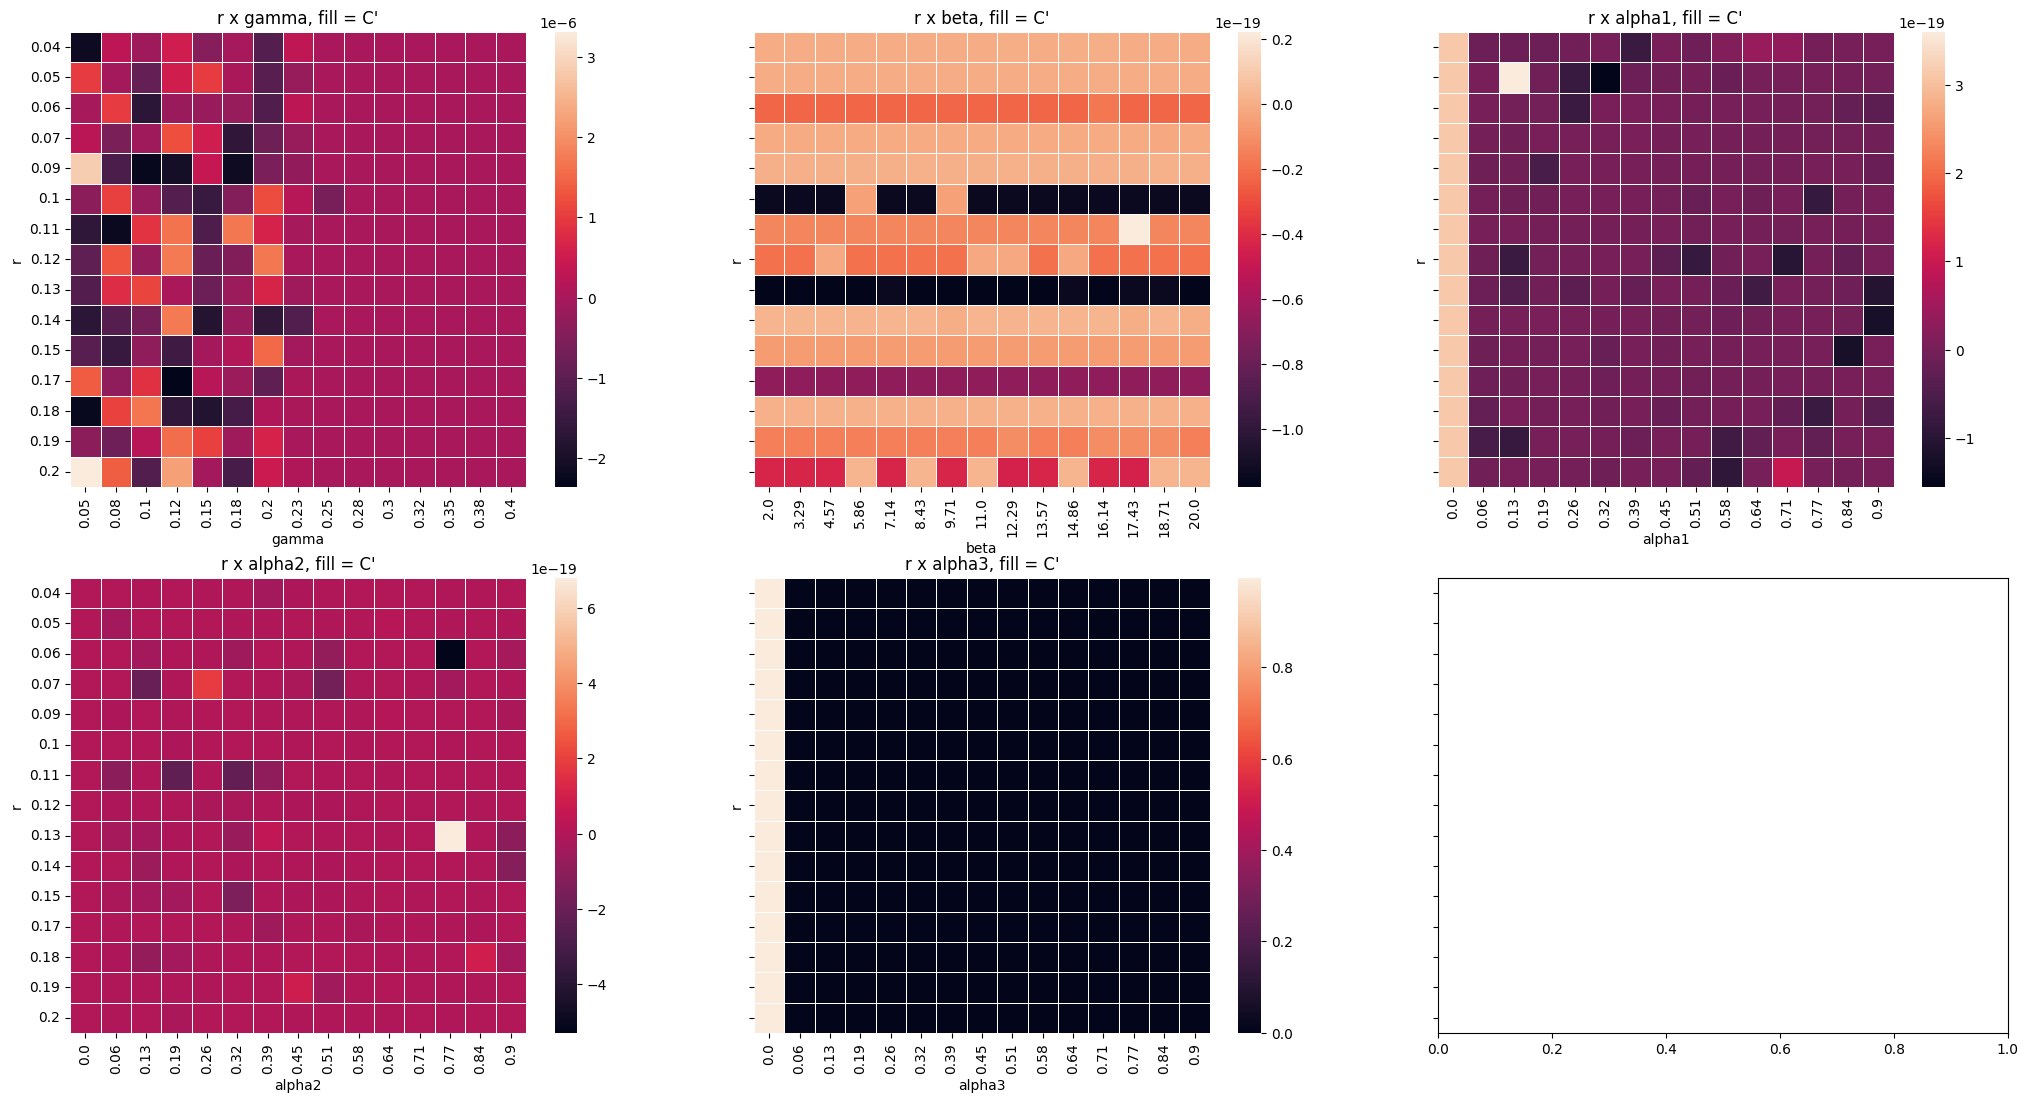

In [198]:
figure, ax = plt.subplots(ncols=3, nrows = 2, sharey=True, figsize=(25, 13))

#---------r x gamma-------------  
r_gamma_heatmap = (
    df_r_gamma
    .pivot(index = "r", columns = "gamma", values = "C_prime"))

sns.heatmap(r_gamma_heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_title("r x gamma, fill = C'");

#---------r x beta-------------  
r_beta_heatmap = (
    df_r_beta
    .pivot(index = "r", columns = "beta", values = "C_prime"))

sns.heatmap(r_beta_heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_title("r x beta, fill = C'");

#---------r x alpha1-------------  
r_alpha1_heatmap = (
    df_r_alpha1
    .pivot(index = "r", columns = "alpha1", values = "C_prime"))

sns.heatmap(r_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[0,2])
ax[0,2].set_title("r x alpha1, fill = C'");

#---------r x alpha2-------------  
r_alpha2_heatmap = (
    df_r_alpha2
    .pivot(index = "r", columns = "alpha2", values = "C_prime"))

sns.heatmap(r_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[1,0])
ax[1,0].set_title("r x alpha2, fill = C'");

#---------r x alpha3-------------  
r_alpha3_heatmap = (
    df_r_alpha3
    .pivot(index = "r", columns = "alpha3", values = "C_prime"))

sns.heatmap(r_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[1,1])
ax[1,1].set_title("r x alpha3, fill = C'")

Gamma x remaining parameters

In [148]:
#---------gamma x beta-------------
gamma_beta_outputs = []
gamma_beta_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

for gamma in gamma_value:
    
    for beta in beta_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_beta_outputs.append((C_array, M_array, T_array))
            gamma_beta_outputs_prime.append((gamma, beta, C_array[-1], M_array[-1], T_array[-1]))

#---------gamma x alpha1-------------
gamma_alpha1_outputs = []
gamma_alpha1_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

for gamma in gamma_value:
    
    for alpha1 in alpha1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_alpha1_outputs.append((C_array, M_array, T_array))
            gamma_alpha1_outputs_prime.append((gamma, alpha1, C_array[-1], M_array[-1], T_array[-1]))

#---------gamma x alpha2-------------
gamma_alpha2_outputs = []
gamma_alpha2_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for gamma in gamma_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_alpha2_outputs.append((C_array, M_array, T_array))
            gamma_alpha2_outputs_prime.append((gamma, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------gamma x alpha3-------------
gamma_alpha3_outputs = []
gamma_alpha3_outputs_prime = []

gamma_value = np.linspace(0.05, 0.4, 15)
gamma_value = np.round(gamma_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for gamma in gamma_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            gamma_alpha3_outputs.append((C_array, M_array, T_array))
            gamma_alpha3_outputs_prime.append((gamma, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [149]:
df_gamma_beta = pd.DataFrame(gamma_beta_outputs_prime, columns=['gamma','beta','C_prime','M_prime','T_prime'])
df_gamma_alpha1 = pd.DataFrame(gamma_alpha1_outputs_prime, columns=['gamma','alpha1','C_prime','M_prime','T_prime'])
df_gamma_alpha2 = pd.DataFrame(gamma_alpha2_outputs_prime, columns=['gamma','alpha2','C_prime','M_prime','T_prime'])
df_gamma_alpha3 = pd.DataFrame(gamma_alpha3_outputs_prime, columns=['gamma','alpha3','C_prime','M_prime','T_prime'])

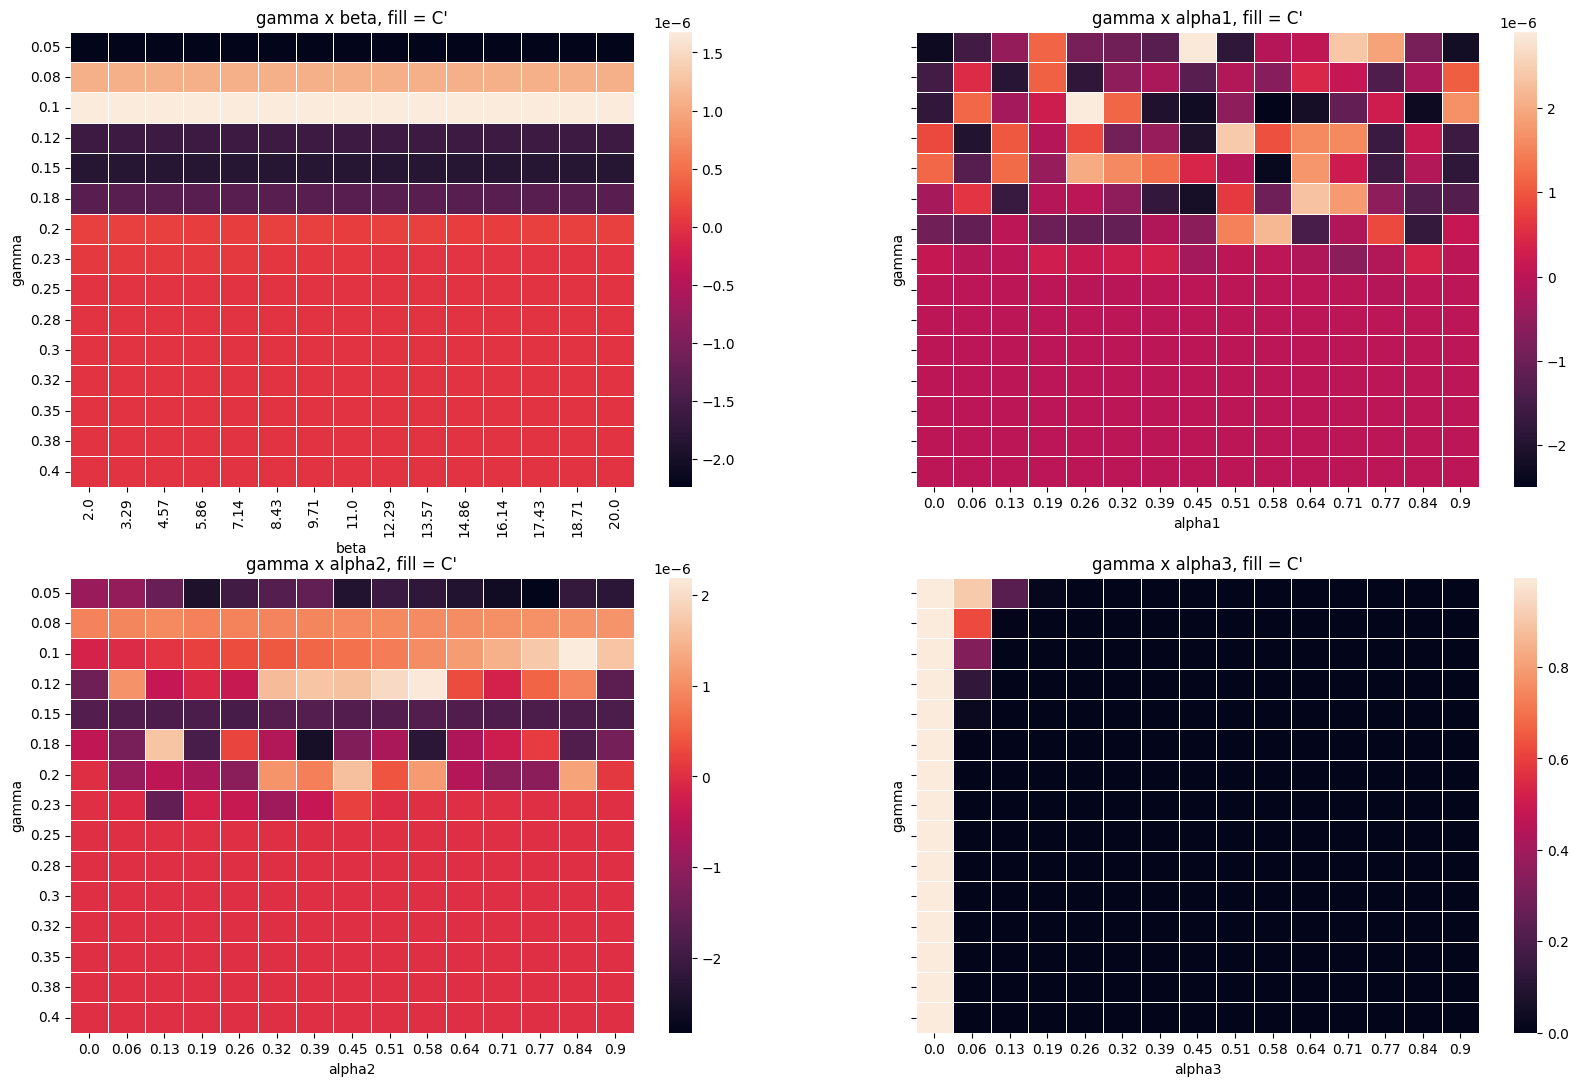

In [151]:
figure, ax = plt.subplots(ncols=2, nrows = 2, sharey=True, figsize=(20, 13))

#---------gamma x beta-------------  
gamma_beta_heatmap = (
    df_gamma_beta
    .pivot(index = "gamma", columns = "beta", values = "C_prime"))

sns.heatmap(gamma_beta_heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_title("gamma x beta, fill = C'");

#---------gamma x alpha1-------------  
gamma_alpha1_heatmap = (
    df_gamma_alpha1
    .pivot(index = "gamma", columns = "alpha1", values = "C_prime"))

sns.heatmap(gamma_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_title("gamma x alpha1, fill = C'");

#---------r x alpha2-------------  
gamma_alpha2_heatmap = (
    df_gamma_alpha2
    .pivot(index = "gamma", columns = "alpha2", values = "C_prime"))

sns.heatmap(gamma_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[1,0])
ax[1,0].set_title("gamma x alpha2, fill = C'");

#---------r x alpha3-------------  
gamma_alpha3_heatmap = (
    df_gamma_alpha3
    .pivot(index = "gamma", columns = "alpha3", values = "C_prime"))

sns.heatmap(gamma_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[1,1])
ax[1,1].set_title("gamma x alpha3, fill = C'");

Beta x remaining parameters

In [170]:
#---------beta x alpha1-------------
beta_alpha1_outputs = []
beta_alpha1_outputs_prime = []

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

for beta in beta_value:
    
    for alpha1 in alpha1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            beta_alpha1_outputs.append((C_array, M_array, T_array))
            beta_alpha1_outputs_prime.append((beta, alpha1, C_array[-1], M_array[-1], T_array[-1]))

#---------beta x alpha2-------------
beta_alpha2_outputs = []
beta_alpha2_outputs_prime = []

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for beta in beta_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            beta_alpha2_outputs.append((C_array, M_array, T_array))
            beta_alpha2_outputs_prime.append((beta, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------beta x alpha3-------------
beta_alpha3_outputs = []
beta_alpha3_outputs_prime = []

beta_value = np.linspace(2, 20, 15)
beta_value = np.round(beta_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for beta in beta_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            beta_alpha3_outputs.append((C_array, M_array, T_array))
            beta_alpha3_outputs_prime.append((beta, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [172]:
df_beta_alpha1 = pd.DataFrame(beta_alpha1_outputs_prime, columns=['beta','alpha1','C_prime','M_prime','T_prime'])
df_beta_alpha2 = pd.DataFrame(beta_alpha2_outputs_prime, columns=['beta','alpha2','C_prime','M_prime','T_prime'])
df_beta_alpha3 = pd.DataFrame(beta_alpha3_outputs_prime, columns=['beta','alpha3','C_prime','M_prime','T_prime'])

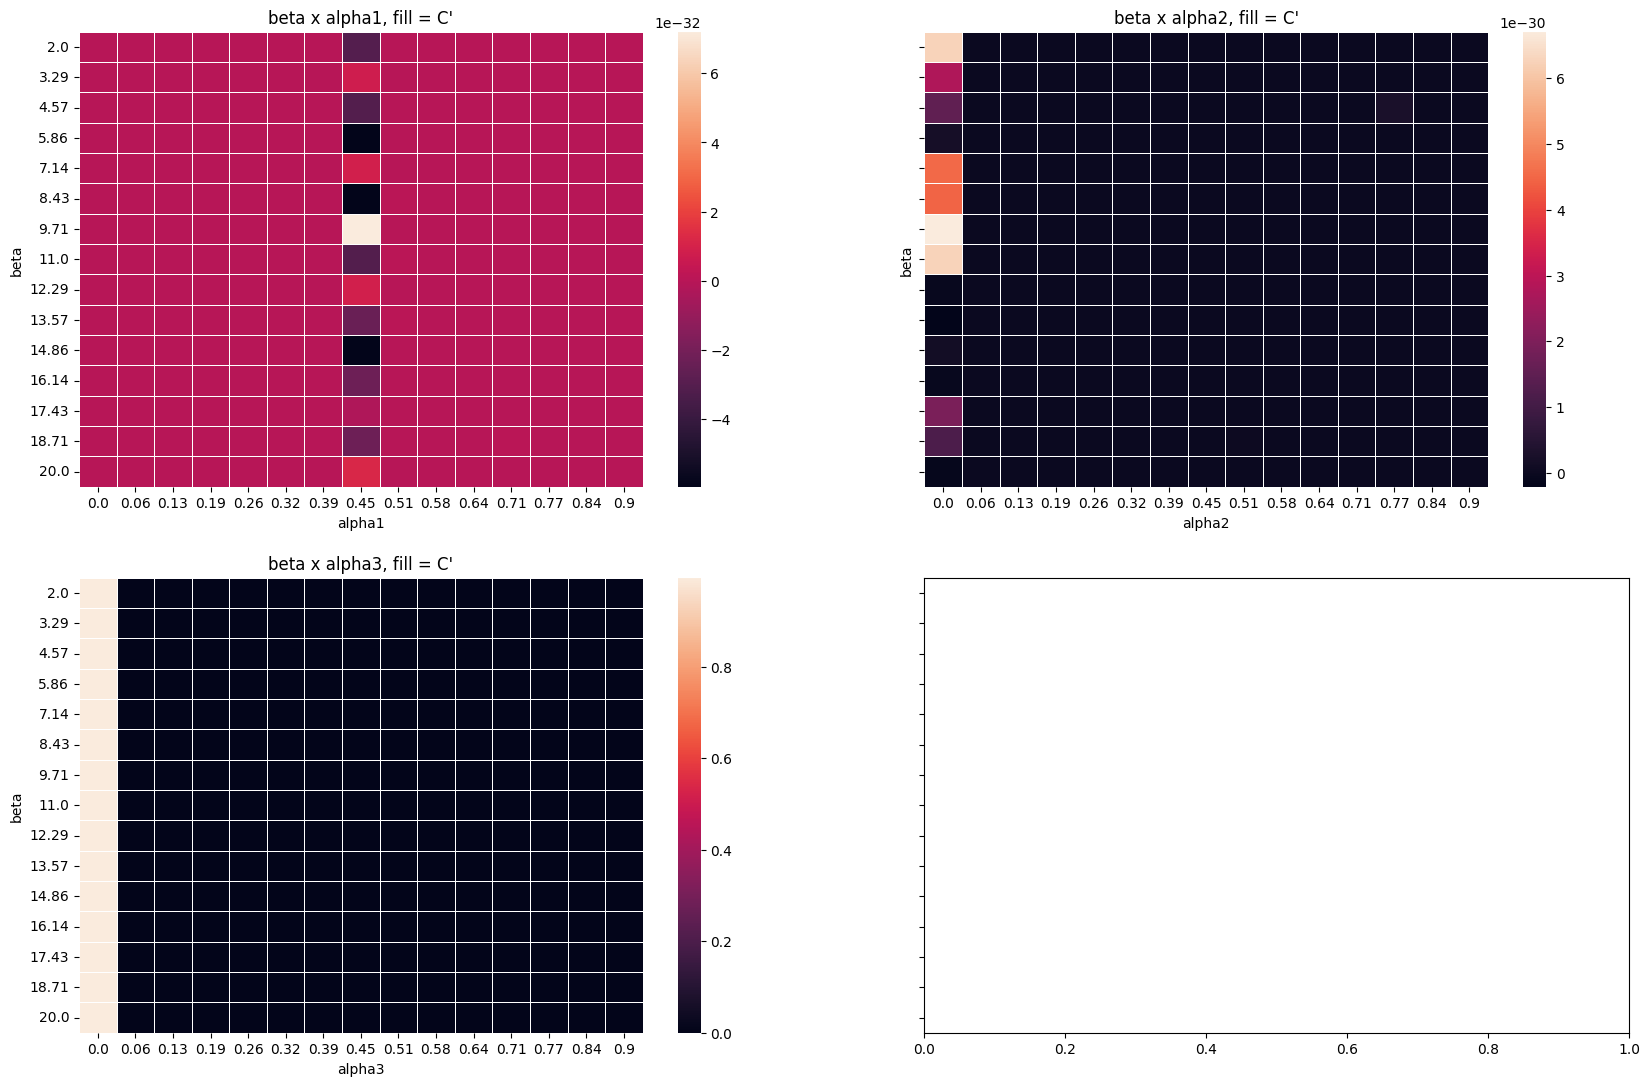

In [174]:
figure, ax = plt.subplots(ncols=2, nrows = 2, sharey=True, figsize=(20, 13))

#---------beta x alpha1-------------  
beta_alpha1_heatmap = (
    df_beta_alpha1
    .pivot(index = "beta", columns = "alpha1", values = "C_prime"))

sns.heatmap(beta_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_title("beta x alpha1, fill = C'");

#---------beta x alpha2-------------  
beta_alpha2_heatmap = (
    df_beta_alpha2
    .pivot(index = "beta", columns = "alpha2", values = "C_prime"))

sns.heatmap(beta_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_title("beta x alpha2, fill = C'");

#---------beta x alpha3-------------  
beta_alpha3_heatmap = (
    df_beta_alpha3
    .pivot(index = "beta", columns = "alpha3", values = "C_prime"))

sns.heatmap(beta_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[1,0])
ax[1,0].set_title("beta x alpha3, fill = C'");

alpha1 x remaining parameters

In [175]:
#---------alpha1 x alpha2-------------
alpha1_alpha2_outputs = []
alpha1_alpha2_outputs_prime = []

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for alpha1 in alpha1_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            alpha1_alpha2_outputs.append((C_array, M_array, T_array))
            alpha1_alpha2_outputs_prime.append((alpha1, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            
#---------alpha1 x alpha3-------------
alpha1_alpha3_outputs = []
alpha1_alpha3_outputs_prime = []

alpha1_value = np.linspace(0, 0.9, 15)
alpha1_value = np.round(alpha1_value,2)

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

for alpha1 in alpha1_value:
    
    for alpha3 in alpha3_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            alpha1_alpha3_outputs.append((C_array, M_array, T_array))
            alpha1_alpha3_outputs_prime.append((alpha1, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [176]:
df_alpha1_alpha2 = pd.DataFrame(alpha1_alpha2_outputs_prime, columns=['alpha1','alpha2','C_prime','M_prime','T_prime'])
df_alpha1_alpha3 = pd.DataFrame(alpha1_alpha3_outputs_prime, columns=['alpha1','alpha3','C_prime','M_prime','T_prime'])

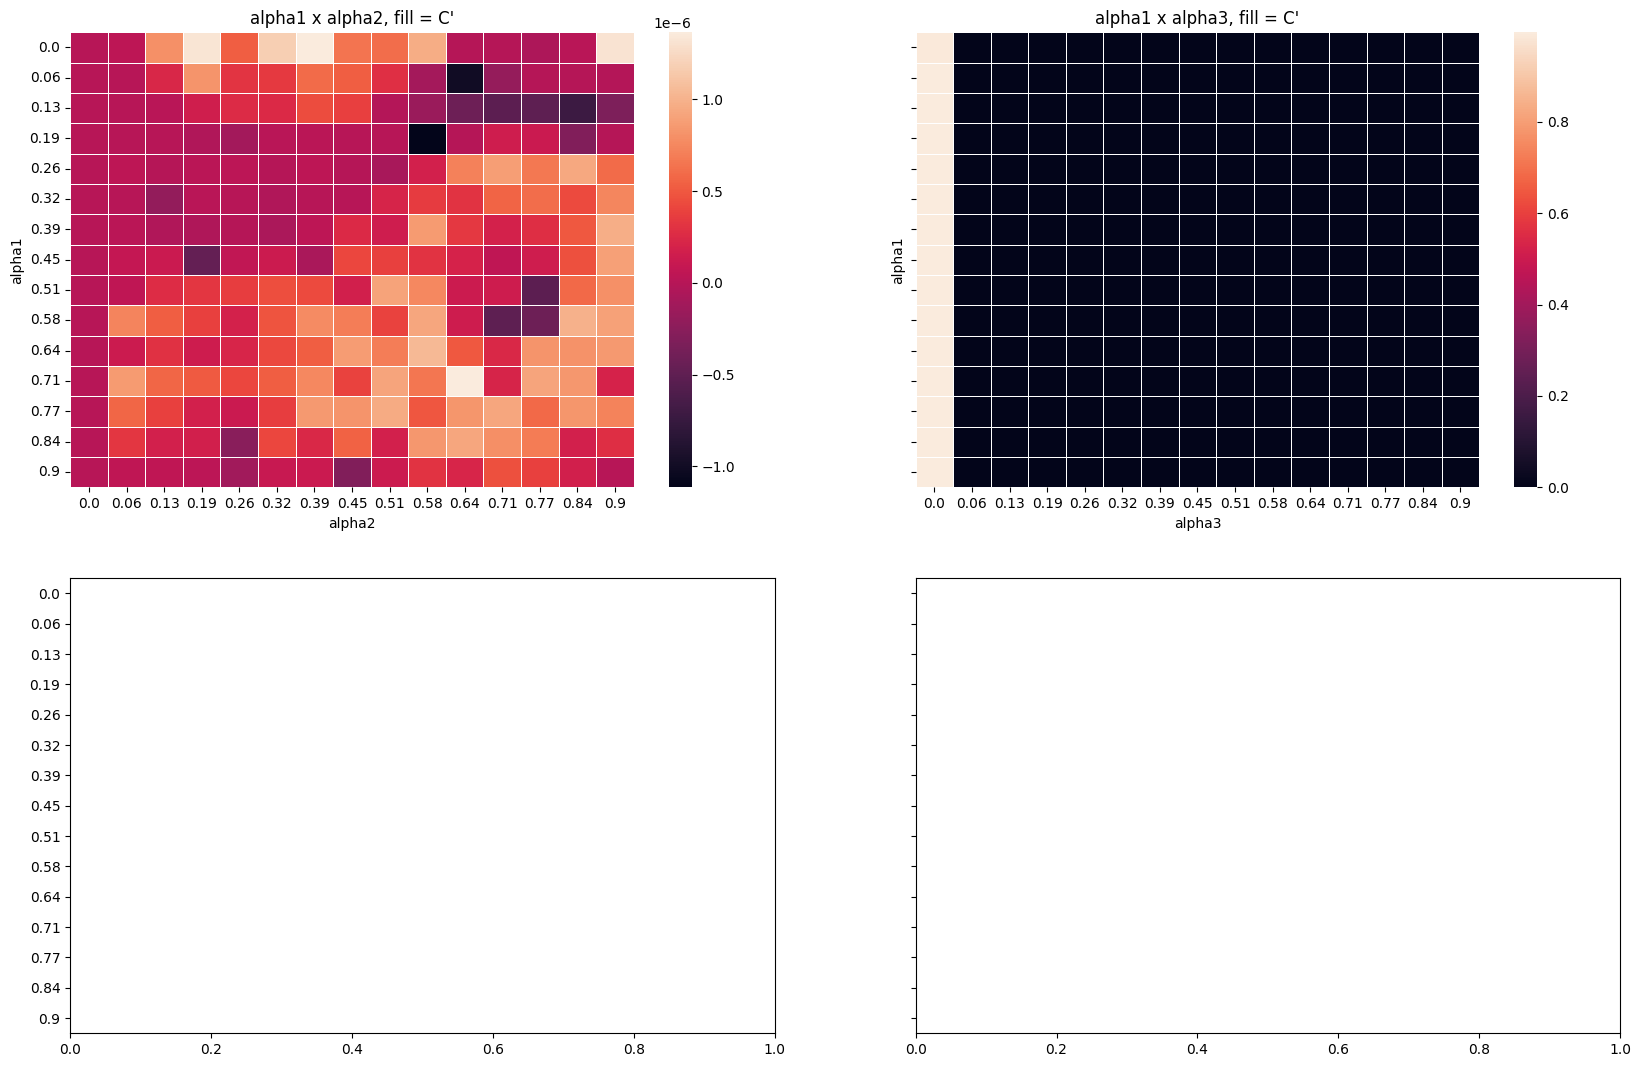

In [189]:
figure, ax = plt.subplots(ncols=2, nrows = 2, sharey=True, figsize=(20, 13))

#---------alpha1 x alpha2-------------  
alpha1_alpha2_heatmap = (
    df_alpha1_alpha2
    .pivot(index = "alpha1", columns = "alpha2", values = "C_prime"))

sns.heatmap(alpha1_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_title("alpha1 x alpha2, fill = C'");

#---------alpha1 x alpha3-------------  
alpha1_alpha3_heatmap = (
    df_alpha1_alpha3
    .pivot(index = "alpha1", columns = "alpha3", values = "C_prime"))

sns.heatmap(alpha1_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_title("alpha1 x alpha3, fill = C'");

alpha2 x alpha3

In [190]:
#---------alpha3 x alpha2-------------
alpha3_alpha2_outputs = []
alpha3_alpha2_outputs_prime = []

alpha3_value = np.linspace(0, 0.9, 15)
alpha3_value = np.round(alpha3_value,2)

alpha2_value = np.linspace(0, 0.9, 15)
alpha2_value = np.round(alpha2_value,2)

for alpha3 in alpha3_value:
    
    for alpha2 in alpha2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points) 

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            alpha3_alpha2_outputs.append((C_array, M_array, T_array))
            alpha3_alpha2_outputs_prime.append((alpha3, alpha2, C_array[-1], M_array[-1], T_array[-1]))

In [191]:
df_alpha3_alpha2 = pd.DataFrame(alpha3_alpha2_outputs_prime, columns=['alpha3','alpha2','C_prime','M_prime','T_prime'])

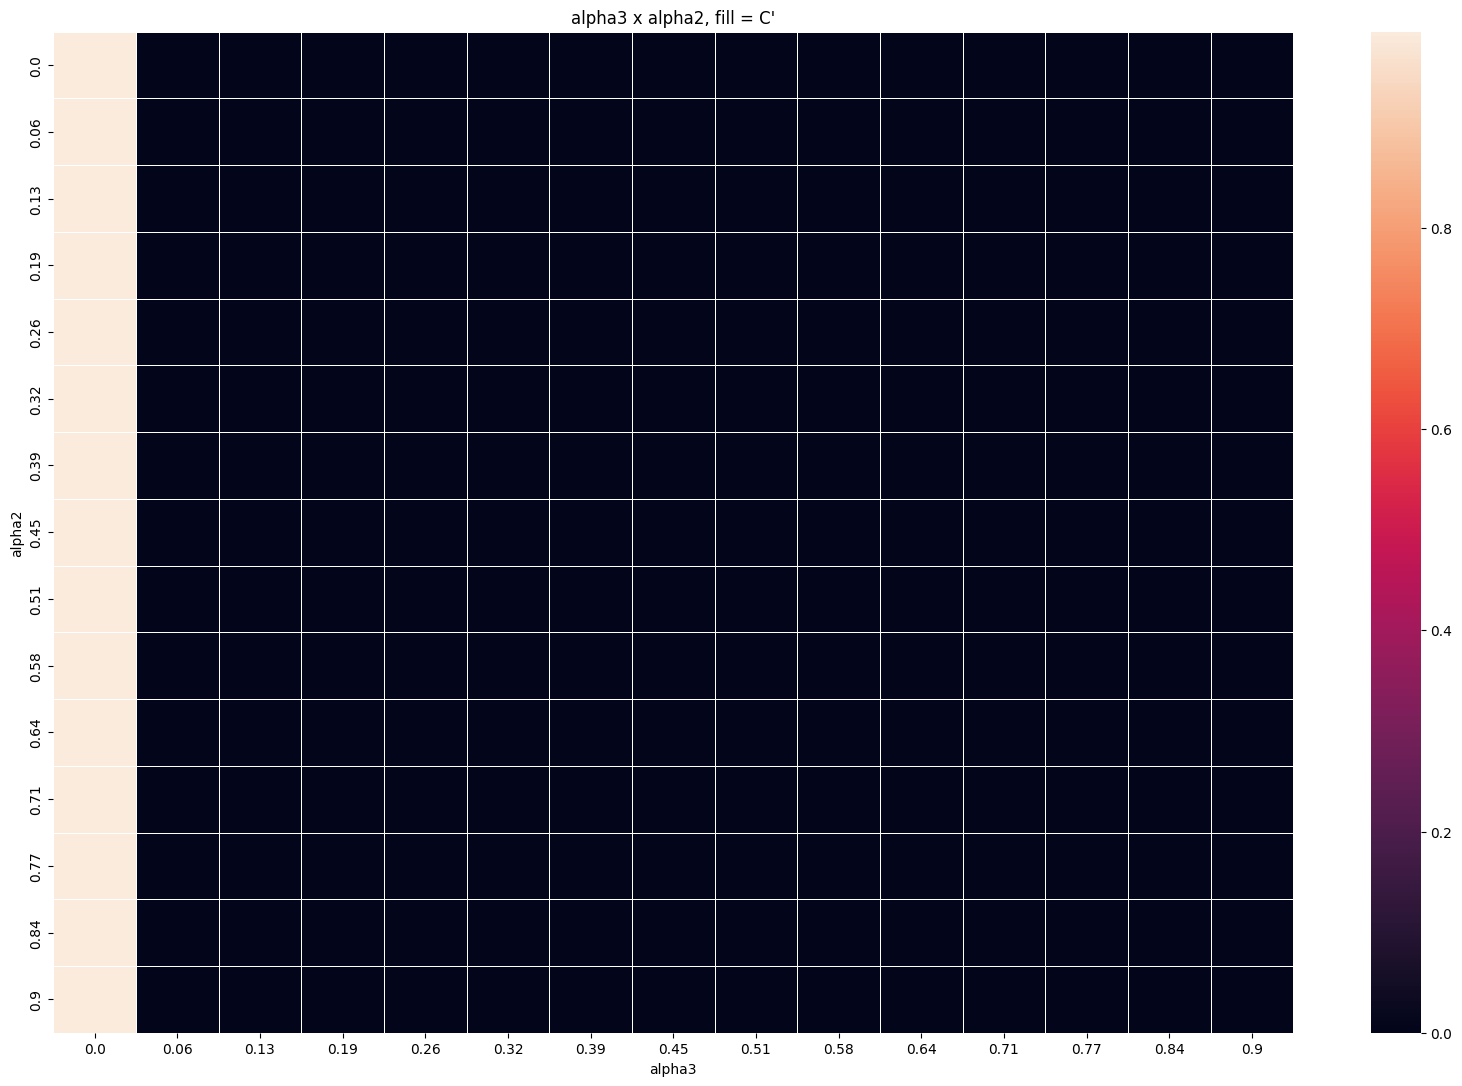

In [194]:
figure, ax = plt.subplots(sharey=True, figsize=(20, 13))

#---------alpha3 x alpha2-------------  
alpha3_alpha2_heatmap = (
    df_alpha3_alpha2
    .pivot(index = "alpha2", columns = "alpha3", values = "C_prime"))

sns.heatmap(alpha3_alpha2_heatmap, annot=False, linewidths=.5, ax=ax)
ax.set_title("alpha3 x alpha2, fill = C'");

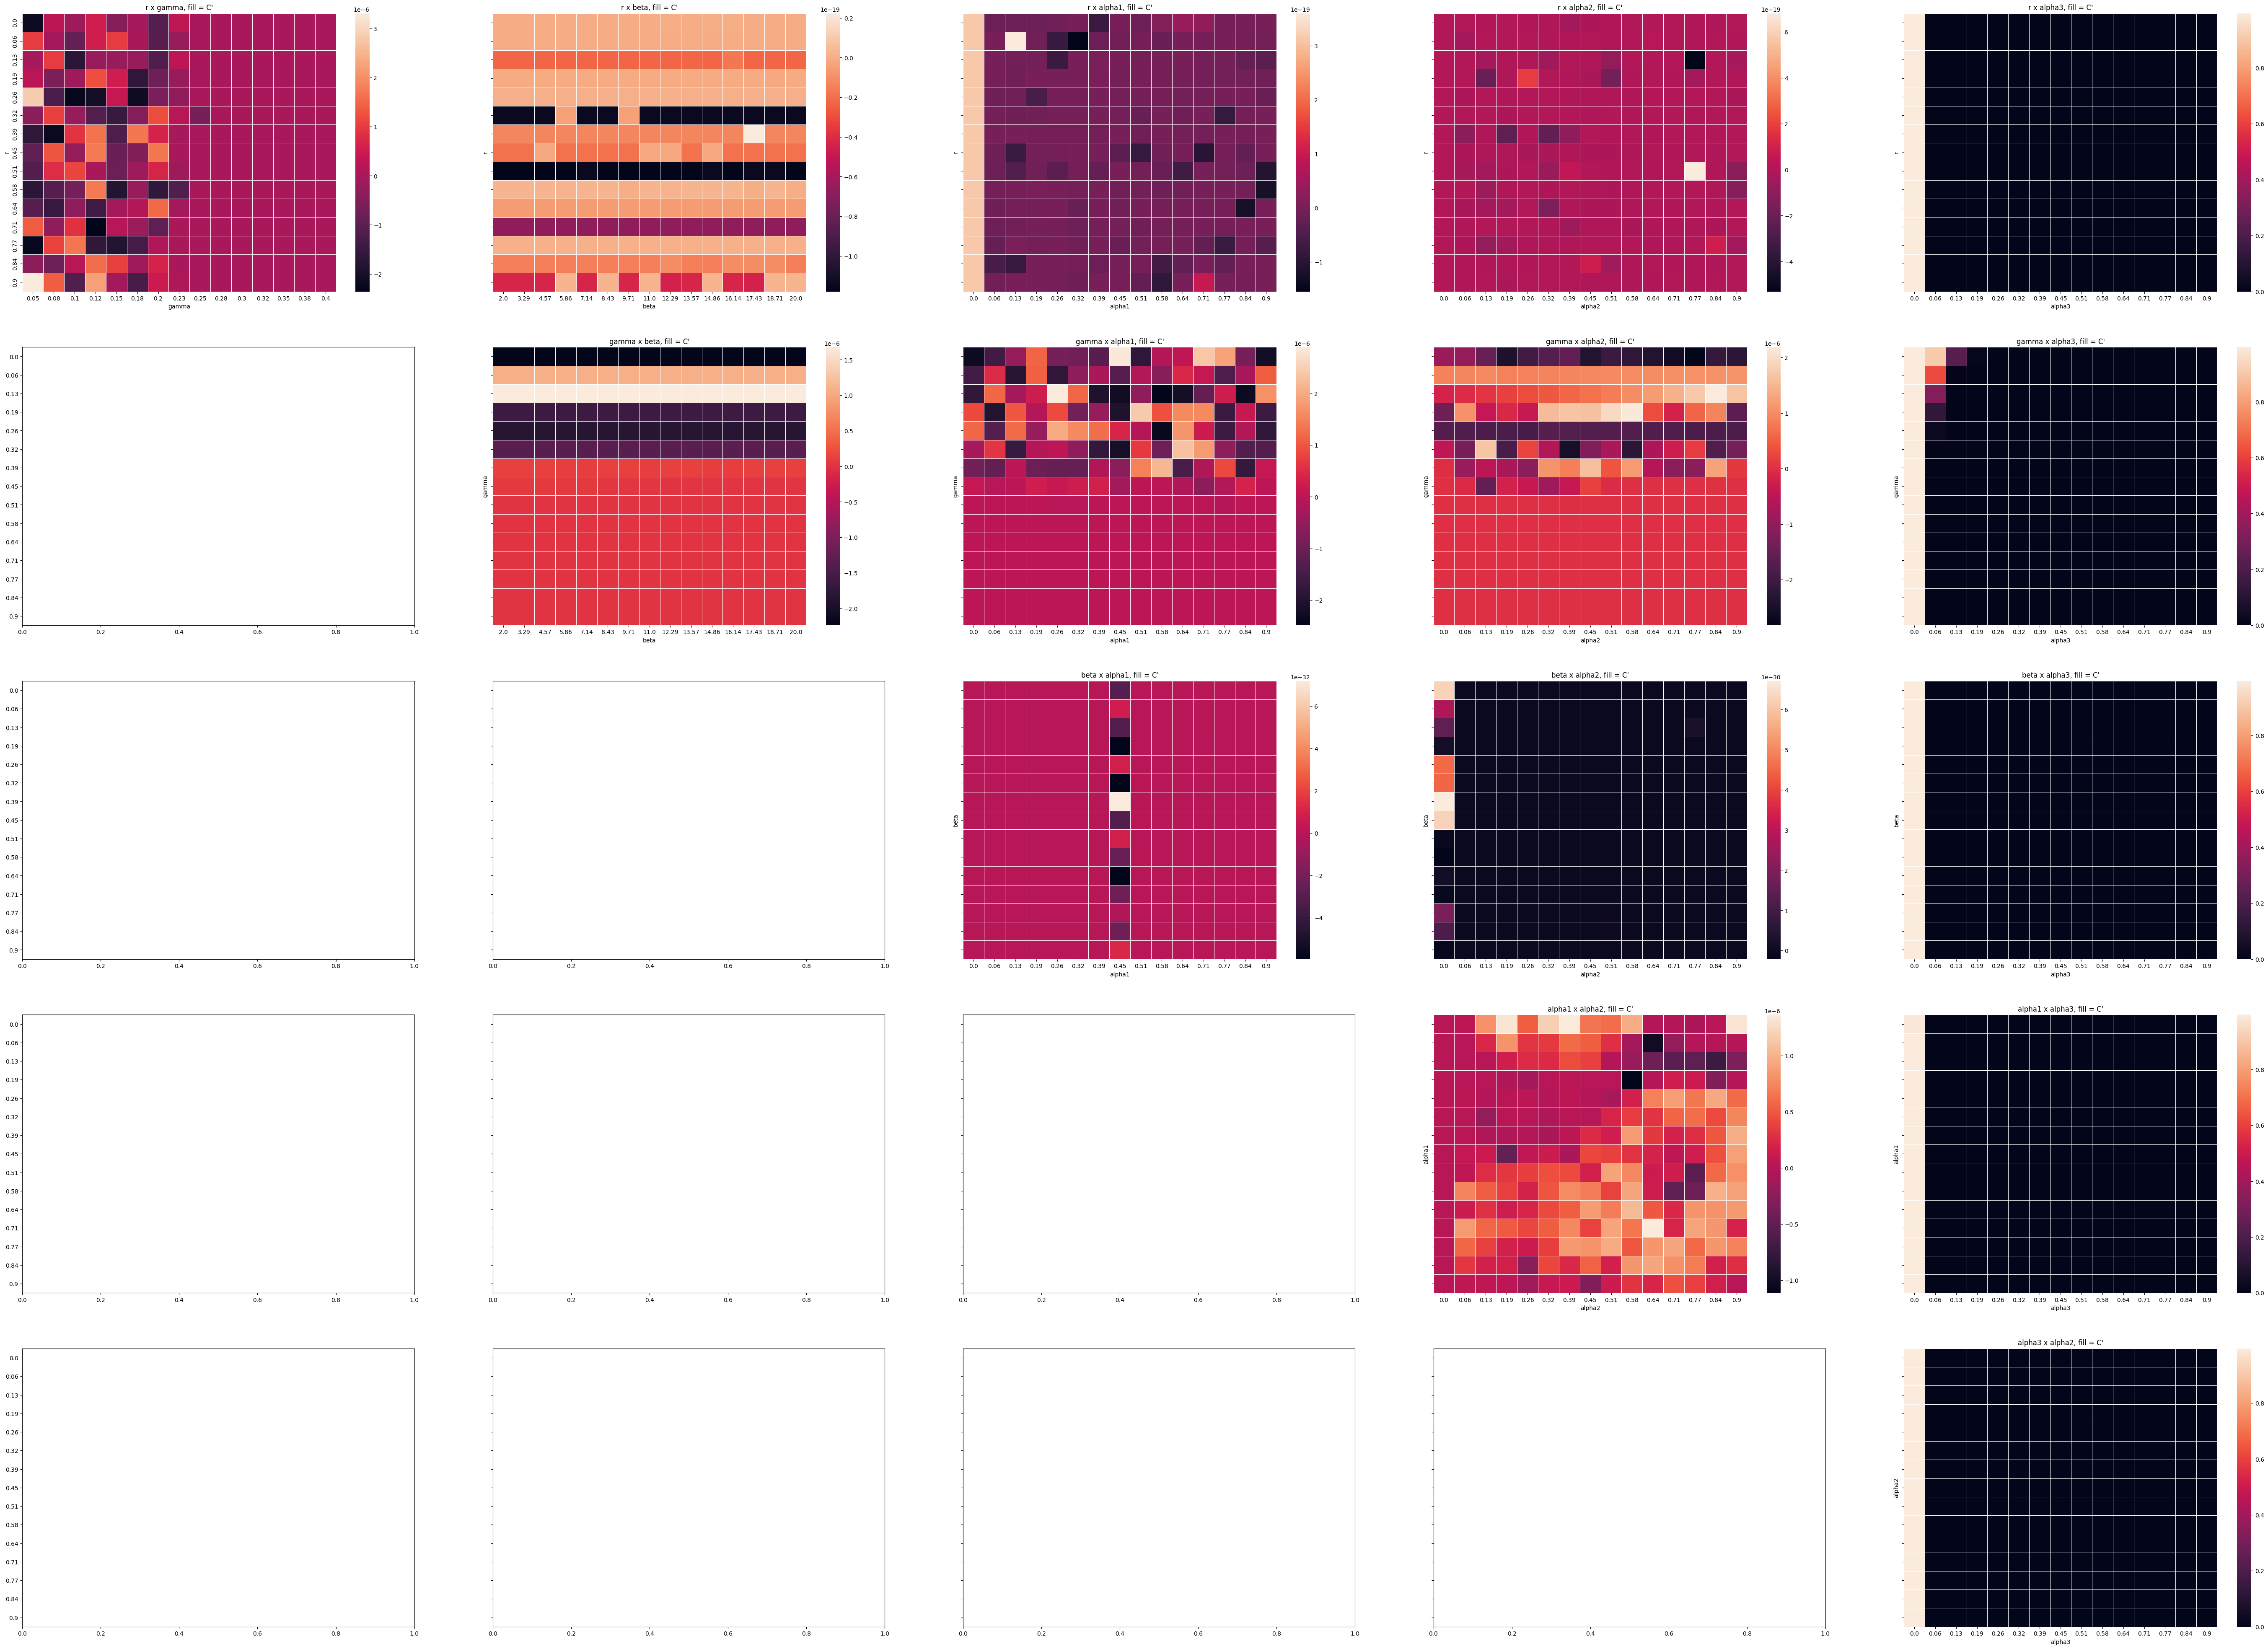

In [210]:
figure, ax = plt.subplots(ncols=5, nrows = 5, sharey=True, figsize=(70, 50))

#---------r x gamma-------------  
r_gamma_heatmap = (
    df_r_gamma
    .pivot(index = "r", columns = "gamma", values = "C_prime"))

sns.heatmap(r_gamma_heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_title("r x gamma, fill = C'");

#---------r x beta-------------  
r_beta_heatmap = (
    df_r_beta
    .pivot(index = "r", columns = "beta", values = "C_prime"))

sns.heatmap(r_beta_heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_title("r x beta, fill = C'");

#---------r x alpha1-------------  
r_alpha1_heatmap = (
    df_r_alpha1
    .pivot(index = "r", columns = "alpha1", values = "C_prime"))

sns.heatmap(r_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[0,2])
ax[0,2].set_title("r x alpha1, fill = C'");

#---------r x alpha2-------------  
r_alpha2_heatmap = (
    df_r_alpha2
    .pivot(index = "r", columns = "alpha2", values = "C_prime"))

sns.heatmap(r_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[0,3])
ax[0,3].set_title("r x alpha2, fill = C'");

#---------r x alpha3-------------  
r_alpha3_heatmap = (
    df_r_alpha3
    .pivot(index = "r", columns = "alpha3", values = "C_prime"))

sns.heatmap(r_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[0,4])
ax[0,4].set_title("r x alpha3, fill = C'")

figure.savefig("gamma x all parameters");

#---------gamma x beta-------------  
gamma_beta_heatmap = (
    df_gamma_beta
    .pivot(index = "gamma", columns = "beta", values = "C_prime"))

sns.heatmap(gamma_beta_heatmap, annot=False, linewidths=.5, ax=ax[1,1])
ax[1,1].set_title("gamma x beta, fill = C'");

#---------gamma x alpha1-------------  
gamma_alpha1_heatmap = (
    df_gamma_alpha1
    .pivot(index = "gamma", columns = "alpha1", values = "C_prime"))

sns.heatmap(gamma_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[1,2])
ax[1,2].set_title("gamma x alpha1, fill = C'");

#---------gamma x alpha2-------------  
gamma_alpha2_heatmap = (
    df_gamma_alpha2
    .pivot(index = "gamma", columns = "alpha2", values = "C_prime"))

sns.heatmap(gamma_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[1,3])
ax[1,3].set_title("gamma x alpha2, fill = C'");

#---------gamma x alpha3-------------  
gamma_alpha3_heatmap = (
    df_gamma_alpha3
    .pivot(index = "gamma", columns = "alpha3", values = "C_prime"))

sns.heatmap(gamma_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[1,4])
ax[1,4].set_title("gamma x alpha3, fill = C'");

#---------beta x alpha1-------------  
beta_alpha1_heatmap = (
    df_beta_alpha1
    .pivot(index = "beta", columns = "alpha1", values = "C_prime"))

sns.heatmap(beta_alpha1_heatmap, annot=False, linewidths=.5, ax=ax[2,2])
ax[2,2].set_title("beta x alpha1, fill = C'");

#---------beta x alpha2-------------  
beta_alpha2_heatmap = (
    df_beta_alpha2
    .pivot(index = "beta", columns = "alpha2", values = "C_prime"))

sns.heatmap(beta_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[2,3])
ax[2,3].set_title("beta x alpha2, fill = C'");

#---------beta x alpha3-------------  
beta_alpha3_heatmap = (
    df_beta_alpha3
    .pivot(index = "beta", columns = "alpha3", values = "C_prime"))

sns.heatmap(beta_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[2,4])
ax[2,4].set_title("beta x alpha3, fill = C'");

#---------alpha1 x alpha2-------------  
alpha1_alpha2_heatmap = (
    df_alpha1_alpha2
    .pivot(index = "alpha1", columns = "alpha2", values = "C_prime"))

sns.heatmap(alpha1_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[3,3])
ax[3,3].set_title("alpha1 x alpha2, fill = C'");

#---------alpha1 x alpha3-------------  
alpha1_alpha3_heatmap = (
    df_alpha1_alpha3
    .pivot(index = "alpha1", columns = "alpha3", values = "C_prime"))

sns.heatmap(alpha1_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[3,4])
ax[3,4].set_title("alpha1 x alpha3, fill = C'");

#---------alpha3 x alpha2-------------  
alpha3_alpha2_heatmap = (
    df_alpha3_alpha2
    .pivot(index = "alpha2", columns = "alpha3", values = "C_prime"))

sns.heatmap(alpha3_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[4,4])
ax[4,4].set_title("alpha3 x alpha2, fill = C'");


figure.savefig("parameter cross-analyses");

# Model with no p1, p2, nor mu BUT it has fish

In [152]:
def dNdt(t, N, r, mu, gamma, beta, alpha1, alpha2, alpha3, g1, b1, e1, theta1, d1, s1):
    
    C,M,T,B = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M - ((g1*M*B)/(b1+M)))*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M)*dt
    dB = (s1*B*(1-(B/C)) - e1*B - d1*B + theta1*B)*dt

    return dC, dM, dT, dB

In [165]:
dt = 1
NUMSTEPS = 1000
NUMYEARS = int(NUMSTEPS/dt)
time_points = np.linspace(0, NUMYEARS, NUMSTEPS+1)

r = (0.04 + 0.2)/2 #coral growth
mu = (0.02 + 0.1)/2 #coral background mortality
gamma = (0.05 + 0.4)/2 #macro algae growth rate over free space
beta = (2 + 20)/2 #turf growth rate onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space


# BROWSER ----------
g1 = 2.0 #maximum grazing rate of browsers (B) on macroalgae
b1 = 1 #the density of macroalgae that leads to half of the maximum grazing rate for browsers (B)

e1 = 0.0 #herbivore browsers (B) emigration rate
theta1 = 0.0 #rate of browser immigration

d1 = 0.0 #herbivore browsers (B) death rate
s1 = 0.0 #intrinsic growth rate of browsers (B)


C0 = 0.99
M0 = 0.005
T0 = 0.005
B0 = 0.096

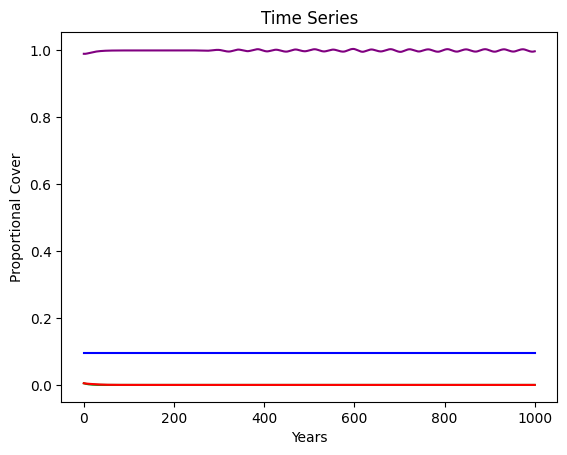

In [166]:
sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0, B0], method = 'RK23', args = (r, mu, gamma, beta, alpha1, alpha2, alpha3, g1, b1, e1, theta1, d1, s1), dense_output=True)
N = sol.sol(time_points)

coral = N[0,:]
macroalgae = N[1,:]
turf = N[2,:]
browser = N[3,:]

plt.plot(time_points, coral, color = 'purple', label = 'coral')
plt.plot(time_points, macroalgae, color = "green", label = 'macroalgae')
plt.plot(time_points, turf, color = "red", label = 'turf')
plt.plot(time_points, browser, color = "blue", label = 'browser')

plt.title("Time Series", fontsize = 12)
plt.xlabel("Years")
plt.ylabel("Proportional Cover");

# Model with only p1 (macro death rate)

In [111]:
def dNdt(t, N, r, mu, p1, gamma, beta, alpha1, alpha2, alpha3):
    
    C,M,T = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M - mu*C)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M - p1*M)*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M)*dt

    return dC, dM, dT

In [112]:
dt = 1
NUMSTEPS = 5000
NUMYEARS = int(NUMSTEPS/dt)
time_points = np.linspace(0, NUMYEARS, NUMSTEPS+1)

r = (0.04 + 0.2)/2 #coral growth
mu = (0.02 + 0.1)/2 #coral background mortality
gamma = (0.05 + 0.4)/2 #turf algae growth rate
beta = (2 + 20)/2 #growth rate of turf algae onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space

C0 = 0.99
M0 = 0.005
T0 = 0.005

In [113]:
p1_outputs = []
p1_outputs_prime = []

p1_value = np.linspace(0, 1.0, 50)
p1_value = np.round(p1_value,2)


for p1 in p1_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p1, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        p1_outputs.append((C_array, M_array, T_array))
        p1_outputs_prime.append((p1, C_array[-1], M_array[-1], T_array[-1]))

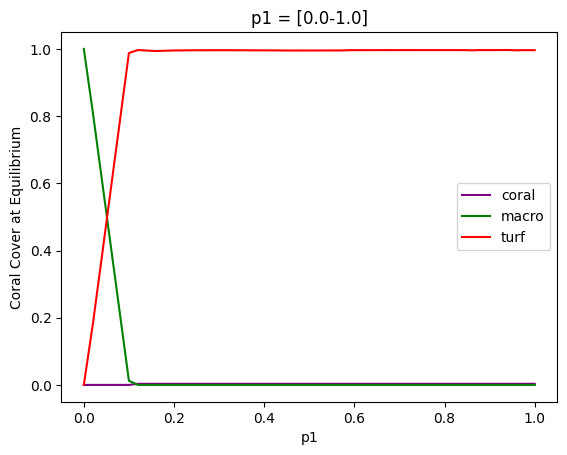

In [177]:
df_p1 = pd.DataFrame(p1_outputs_prime, columns=['p1','C_prime','M_prime','T_prime'])

plt.plot(df_p1['p1'], df_p1['C_prime'], label = 'coral', c = 'purple')
plt.plot(df_p1['p1'], df_p1['M_prime'], label = 'macro', c = 'green')
plt.plot(df_p1['p1'], df_p1['T_prime'], label = 'turf', c = 'red')
    
plt.title("p1 = [0.0-1.0]", fontsize = 12)
plt.xlabel("p1")
plt.ylabel("Coral Cover at Equilibrium")
plt.legend();

In [115]:
#---------GAMMA-------------  
p1_gamma_outputs = []
p1_gamma_outputs_prime = []

gamma_value = np.linspace(2, 20, 10)
gamma_value = np.round(gamma_value,2)

p1_value = np.linspace(0.0, 0.2, 11)
p1_value = np.round(p1_value,2)

for gamma in gamma_value:
    
    for p1 in p1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p1, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points)

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            p1_gamma_outputs.append((C_array, M_array, T_array))
            p1_gamma_outputs_prime.append((p1, gamma, C_array[-1], M_array[-1], T_array[-1]))


KeyboardInterrupt: 

In [ ]:
#----------BETA------------
p1_beta_outputs = []
p1_beta_outputs_prime = []

beta_value = np.linspace(2, 20, 10)
beta_value = np.round(beta_value,2)

p1_value = np.linspace(0.0, 0.2, 11)
p1_value = np.round(p1_value,2)

for beta in beta_value:
    
    for p1 in p1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p1, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points)

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            p1_beta_outputs.append((C_array, M_array, T_array))
            p1_beta_outputs_prime.append((p1, beta, C_array[-1], M_array[-1], T_array[-1]))
            

In [ ]:
#---------ALPHA2-------------
p1_alpha2_outputs = []
p1_alpha2_outputs_prime = []

alpha2_value = np.linspace(2, 20, 10)
alpha2_value = np.round(alpha2_value,2)

p1_value = np.linspace(0.0, 0.2, 11)
p1_value = np.round(p1_value,2)

for alpha2 in alpha2_value:
    
    for p1 in p1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p1, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points)

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            p1_alpha2_outputs.append((C_array, M_array, T_array))
            p1_alpha2_outputs_prime.append((p1, alpha2, C_array[-1], M_array[-1], T_array[-1]))
            

In [ ]:
#---------ALPHA3-------------
p1_alpha3_outputs = []
p1_alpha3_outputs_prime = []

alpha3_value = np.linspace(0, 0.9, 10)
alpha3_value = np.round(alpha3_value,2)

p1_value = np.linspace(0.0, 0.2, 11)
p1_value = np.round(p1_value,2)

for alpha3 in alpha3_value:
    
    for p1 in p1_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p1, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points)

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            p1_alpha3_outputs.append((C_array, M_array, T_array))
            p1_alpha3_outputs_prime.append((p1, alpha3, C_array[-1], M_array[-1], T_array[-1]))

In [ ]:
figure, ax = plt.subplots(ncols=2, nrows = 2, sharey=True, figsize=(14, 5))

#---------GAMMA-------------  
df_p1_gamma = pd.DataFrame(p1_gamma_outputs_prime, columns=['p1','gamma','C_prime','M_prime','T_prime'])

p1_gamma_heatmap = (
    df_p1_gamma
    .pivot(index = "p1", columns = "gamma", values = "C_prime", cmap = "mako"))

sns.heatmap(p1_gamma_heatmap, annot=False, linewidths=.5, ax=ax[0,0])
ax[0,0].set_title("gamma x p1, fill = C'");


#----------BETA------------
df_p1_beta = pd.DataFrame(p1_beta_outputs_prime, columns=['p1','beta','C_prime','M_prime','T_prime'])

p1_beta_heatmap = (
    df_p1_beta
    .pivot(index = "p1", columns = "beta", values = "C_prime"))

sns.heatmap(p1_beta_heatmap, annot=False, linewidths=.5, ax=ax[0,1])
ax[0,1].set_title("beta x p1, fill = C'");


#---------ALPHA2-------------
df_p1_alpha2 = pd.DataFrame(p1_alpha2_outputs_prime, columns=['p1','alpha2','C_prime','M_prime','T_prime'])

p1_alpha2_heatmap = (
    df_p1_alpha2
    .pivot(index = "p1", columns = "alpha2", values = "C_prime"))

sns.heatmap(p1_alpha2_heatmap, annot=False, linewidths=.5, ax=ax[1,0])
ax[1,0].set_title("alpha2 x p1, fill = C'");


#---------ALPHA3-------------
df_p1_alpha3 = pd.DataFrame(p1_alpha3_outputs_prime, columns=['p1','alpha3','C_prime','M_prime','T_prime'])

p1_alpha3_heatmap = (
    df_p1_alpha3
    .pivot(index = "p1", columns = "alpha3", values = "C_prime"))

sns.heatmap(p1_alpha3_heatmap, annot=False, linewidths=.5, ax=ax[1,1])
ax[1,1].set_title("alpha3 x p1, fill = C'");


# Model with only p2 (turf death rate)

In [100]:
def dNdt(t, N, r, mu, p2, gamma, beta, alpha1, alpha2, alpha3):
    
    C,M,T = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M - mu*C)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M)*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M - p2*T)*dt

    return dC, dM, dT

In [101]:
dt = 1
NUMSTEPS = 1000
NUMYEARS = int(NUMSTEPS/dt)
time_points = np.linspace(0, NUMYEARS, NUMSTEPS+1)

r = (0.04 + 0.2)/2 #coral growth
mu = (0.02 + 0.1)/2 #coral background mortality
gamma = (0.05 + 0.4)/2 #turf algae growth rate
beta = (2 + 20)/2 #growth rate of turf algae onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space

C0 = 0.99
M0 = 0.005
T0 = 0.005

In [103]:
p2_outputs = []
p2_outputs_prime = []

p2_value = np.linspace(0, 1.0, 50)
p2_value = np.round(p2_value,2)


for p2 in p2_value:

    if (C0 + M0 + T0 <= 1):
            
        sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p2, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
        N = sol.sol(time_points)

        C_array = N[0,:]
        M_array = N[1,:]
        T_array = N[2,:]

        p2_outputs.append((C_array, M_array, T_array))
        p2_outputs_prime.append((p2, C_array[-1], M_array[-1], T_array[-1]))

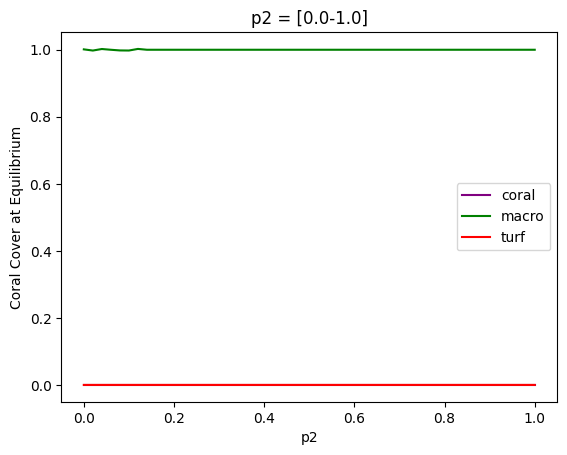

In [105]:
df_p2 = pd.DataFrame(p2_outputs_prime, columns=['p2','C_prime','M_prime','T_prime'])

plt.plot(df_p2['p2'], df_p2['C_prime'], label = 'coral', c = 'purple')
plt.plot(df_p2['p2'], df_p2['M_prime'], label = 'macro', c = 'green')
plt.plot(df_p2['p2'], df_p2['T_prime'], label = 'turf', c = 'red')
    
plt.title("p2 = [0.0-1.0]", fontsize = 12)
plt.xlabel("p2")
plt.ylabel("Coral Cover at Equilibrium")
plt.legend();

In [ ]:
#---------GAMMA-------------  
p2_gamma_outputs = []
p2_gamma_outputs_prime = []

gamma_value = np.linspace(2, 20, 10)
gamma_value = np.round(gamma_value,2)

p2_value = np.linspace(0.0, 0.2, 11)
p2_value = np.round(p2_value,2)

for gamma in gamma_value:
    
    for p2 in p2_value:

        if (C0 + M0 + T0 <= 1):

            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p2, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points)

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            p2_gamma_outputs.append((C_array, M_array, T_array))
            p2_gamma_outputs_prime.append((p2, gamma, C_array[-1], M_array[-1], T_array[-1]))


# Model with p1 AND p2

In [193]:
def dNdt(t, N, r, mu, p1, p2, gamma, beta, alpha1, alpha2, alpha3):
    
    C,M,T = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M - mu*C)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M - p1*M)*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M - p2*T)*dt

    return dC, dM, dT

In [124]:
dt = 1
NUMSTEPS = 10000
NUMYEARS = int(NUMSTEPS/dt)

r = (0.04 + 0.2)/2 #coral growth
mu = (0.02 + 0.1)/2 #coral background mortality
gamma = (0.05 + 0.4)/2 #turf algae growth rate
beta = (2 + 20)/2 #growth rate of turf algae onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space

C0 = 0.99
M0 = 0.005
T0 = 0.005

In [125]:
p1p2_outputs = []
p1p2_outputs_prime = []

p2_value = np.linspace(0, 1.0, 11)
p2_value = np.round(p2_value,2)

p1_value = np.linspace(0, 1.0, 11)
p1_value = np.round(p1_value,2)


for p2 in p2_value:
    
    for p1 in p1_value:

        if (C0 + M0 + T0 <= 1):
            
            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p1, p2, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points)

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            p1p2_outputs.append((C_array, M_array, T_array))
            p1p2_outputs_prime.append((p1, p2, C_array[-1], M_array[-1], T_array[-1]))

In [126]:
df_p1p2 = pd.DataFrame(p1p2_outputs_prime, columns=['p1','p2','C_prime','M_prime','T_prime'])

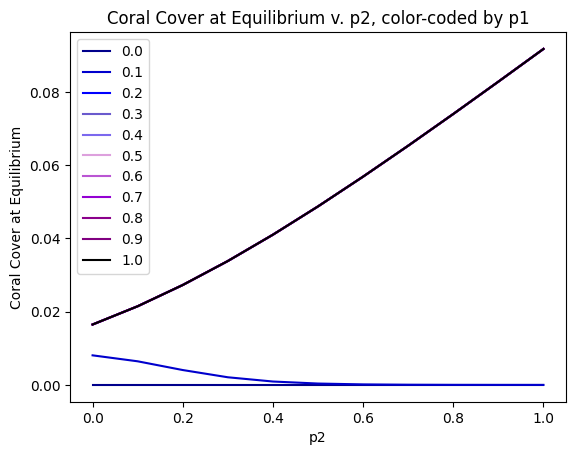

In [128]:
col = ['darkblue', 'mediumblue', 'blue', 'slateblue', 'mediumslateblue', 
       'plum', 'mediumorchid', 'darkviolet', 'darkmagenta', 'purple', 'black']

for i in np.linspace(0.0, 1.0, 11):
    x = round(i,1)
    df = df_p1p2[df_p1p2.p1 == x]
    
    y = x*10
    z = int(y)
    
    plt.plot(df['p2'], df['C_prime'], label = x, c = col[z])
    
plt.title("Coral Cover at Equilibrium v. p2, color-coded by p1", fontsize = 12)
plt.xlabel("p2")
plt.ylabel("Coral Cover at Equilibrium")
plt.legend();

In [206]:
dt = 1
NUMSTEPS = 10000
NUMYEARS = int(NUMSTEPS/dt)

r = (0.04 + 0.2)/2 #coral growth
mu = (0.02 + 0.1)/2 #coral background mortality
gamma = (0.05 + 0.4)/2 #turf algae growth rate
beta = (2 + 20)/2 #growth rate of turf algae onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space
p2 = 1.0

C0 = 0.99
M0 = 0.005
T0 = 0.005


p1_beta_outputs = []
p1_beta_outputs_prime = []

beta_value = np.linspace(2, 20, 10)
beta_value = np.round(beta_value,2)

p1_value = [0.0,0.2,0.3]
p1_value = np.round(p1_value,2)


for beta in beta_value:
    
    for p1 in p1_value:

        if (C0 + M0 + T0 <= 1):
            
            sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, mu, p1, p2, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
            N = sol.sol(time_points)

            C_array = N[0,:]
            M_array = N[1,:]
            T_array = N[2,:]

            p1_beta_outputs.append((C_array, M_array, T_array))
            p1_beta_outputs_prime.append((p1, beta, C_array[-1], M_array[-1], T_array[-1]))


In [207]:
df_p1_beta = pd.DataFrame(p1_beta_outputs_prime, columns=['p1','beta','C_prime','M_prime','T_prime'])

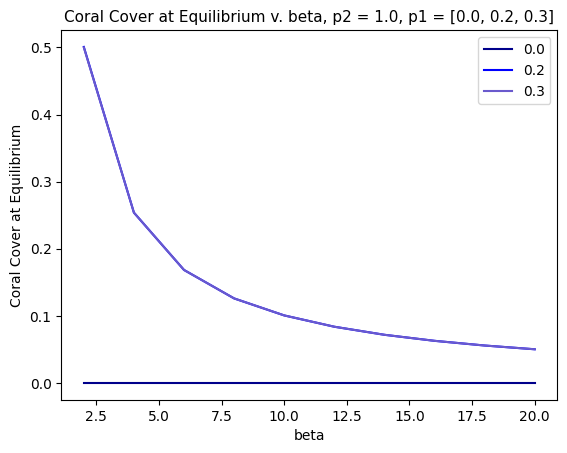

In [209]:
col = ['darkblue', 'mediumblue', 'blue', 'slateblue', 'mediumslateblue', 
       'plum', 'mediumorchid', 'darkviolet', 'darkmagenta', 'purple', 'black']

for i in p1_value:
    x = round(i,1)
    df = df_p1_beta[df_p1_beta.p1 == x]
    
    y = x*10
    z = int(y)
    
    plt.plot(df['beta'], df['C_prime'], label = x, c = col[z])
    
plt.title("Coral Cover at Equilibrium v. beta, p2 = 1.0, p1 = [0.0, 0.2, 0.3]", fontsize = 11)
plt.xlabel("beta")
plt.ylabel("Coral Cover at Equilibrium")
plt.legend();

### In the current model system, with these initial conditions, coral CANNOT exist when both p1 and p2 are removed. Although, coral CAN exist when p1 (macro death rate) is 0.2, and p2 (turf death rate) is from 0.0-0.5. Above p2 = 0.5, coral cannot exist unless p1 is sufficiently high (above 0.2).

# The macroalgae population dominates, even when beta is low, and even when intitial macroalgal cover is low. Consider:
1. Getting rid of coral mortality (and thus assuming all terms are net growth rates)
2. Re-introducing 1 or both algal death rates. A potential way to re-integrate them is to plot p1/p2 v.s. coral cover at equilbrium, and select the values that (1) either do not produce AltSS or (2) lie at the critical point between different alternative stable states.

### Getting rid of coral mortality

In [52]:
def dNdt(t, N, r, gamma, beta, alpha1, alpha2, alpha3):
    
    C,M,T = N
    
    dC = (r*C*(1-C-M-T) + alpha1*r*C*T - alpha3*gamma*C*M)*dt
    dM = (gamma*M*(1-C-M-T) + alpha2*gamma*T*M + alpha3*gamma*C*M)*dt
    dT = (beta*T*(1-C-M-T) - alpha1*r*C*T - alpha2*gamma*T*M)*dt

    return dC, dM, dT

In [53]:
dt = 1
NUMSTEPS = 1000
NUMYEARS = int(NUMSTEPS/dt)
time_points = np.linspace(0, NUMYEARS, NUMSTEPS+1)

r = (0.04 + 0.2)/2 #coral growth
gamma = (0.05 + 0.4)/2 #turf algae growth rate
beta = (2 + 20)/2 #growth rate of turf algae onto free space
alpha1 = 1.0/2 #growth rate of corals onto turf relative to the rate onto free space
alpha2 = 0.9/2 #growth rate of macroalgae onto turf relative to the rate onto free space
alpha3 = 0.9/2 #rate of macroalgal overgrowth onto coral relative to the rate onto free space

C0 = 0.9
M0 = 0.01
T0 = 0.01

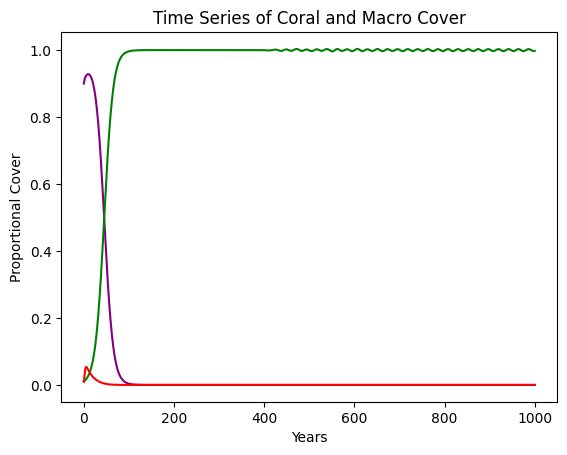

In [54]:
sol = solve_ivp(dNdt, [0,NUMYEARS], [C0, M0, T0], method = 'RK23', args = (r, gamma, beta, alpha1, alpha2, alpha3), dense_output=True)
N = sol.sol(time_points)

coral = N[0,:]
macroalgae = N[1,:]
turf = N[2,:]

plt.plot(time_points, coral, color = 'purple', label = 'coral')
plt.plot(time_points, macroalgae, color = "green", label = 'macroalgae')
plt.plot(time_points, turf, color = "red", label = 'turf')

plt.title("Time Series of Coral and Macro Cover", fontsize = 12)
plt.xlabel("Years")
plt.ylabel("Proportional Cover");